In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
lung_cancer = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = lung_cancer.data.features 
y = lung_cancer.data.targets 
  
# metadata 
print(lung_cancer.metadata) 
  
# variable information 
print(lung_cancer.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [3]:
X.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [4]:
X.columns.shape

(30,)

In [5]:
y.value_counts()

Diagnosis
B            357
M            212
Name: count, dtype: int64

In [6]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
X.isna().sum().sum()

np.int64(0)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
RANDOM_STATE = 42

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2, random_state=RANDOM_STATE)
principal_components = pca.fit_transform(x_scaled)

print("\n--- Explained Variance ---")
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.2%}")


--- Explained Variance ---
Variance explained by PC1: 44.27%
Variance explained by PC2: 18.97%
Total variance explained by 2 components: 63.24%


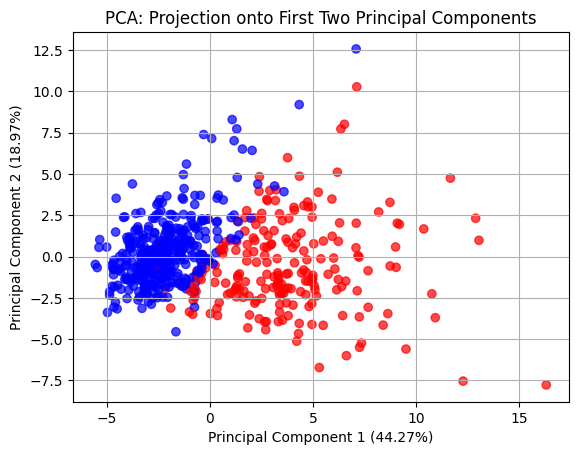

In [32]:
import matplotlib.pyplot as plt
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], 
                      c=["red" if label == "M" else "blue" for label in y["Diagnosis"]],
                      alpha=0.7) # Add c=y here if you have labels

# Add labels and title
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})")
plt.title("PCA: Projection onto First Two Principal Components")
plt.grid(True)


--- Explained Variance (3 Components) ---
Variance explained by PC1: 44.27%
Variance explained by PC2: 18.97%
Variance explained by PC3: 9.39%
Total variance explained by 3 components: 72.64%


/var/folders/_m/zyrbphls3w34fhsvk8rqt6880000gn/T/ipykernel_11649/3040339093.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(principal_components_3d[:, 0], # PC1 on x-axis


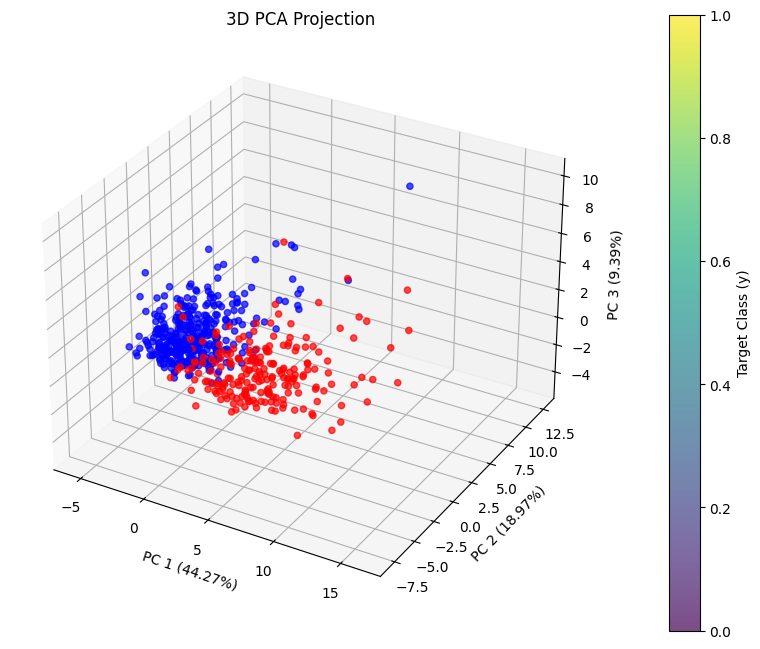

In [33]:
pca = PCA(n_components=3, random_state=RANDOM_STATE)
principal_components_3d = pca.fit_transform(x_scaled)


print("\n--- Explained Variance (3 Components) ---")
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Variance explained by PC3: {pca.explained_variance_ratio_[2]:.2%}") # Added PC3
print(f"Total variance explained by 3 components: {pca.explained_variance_ratio_.sum():.2%}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(principal_components_3d[:, 0], # PC1 on x-axis
                     principal_components_3d[:, 1], # PC2 on y-axis
                     principal_components_3d[:, 2], # PC3 on z-axis
                     c=["red" if label == "M" else "blue" for label in y["Diagnosis"]],
                     cmap='viridis', 
                     alpha=0.7)

ax.set_xlabel(f"PC 1 ({pca.explained_variance_ratio_[0]:.2%})")
ax.set_ylabel(f"PC 2 ({pca.explained_variance_ratio_[1]:.2%})")
ax.set_zlabel(f"PC 3 ({pca.explained_variance_ratio_[2]:.2%})")
ax.set_title("3D PCA Projection")

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Target Class (y)")

plt.show()

Number of components needed for 95% variance: 10


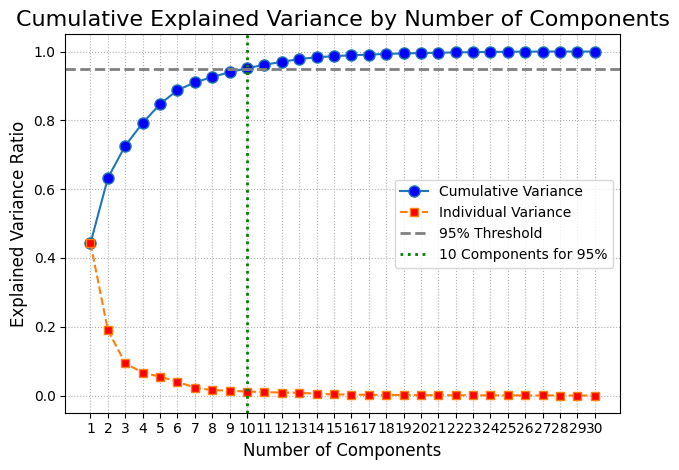

In [34]:
import numpy as np

pca = PCA(n_components=None, random_state=RANDOM_STATE)
pca.fit(x_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

components_for_95_variance = np.argmax(cumulative_variance >= 0.95) + 1 # Add 1 for 0-based index

print(f"Number of components needed for 95% variance: {components_for_95_variance}")

num_components = len(explained_variance)
component_numbers = np.arange(1, num_components + 1)

plt.plot(component_numbers, cumulative_variance, 'o-', markerfacecolor='blue', markersize=8, label='Cumulative Variance')
plt.plot(component_numbers, explained_variance, 's--', markerfacecolor='red', markersize=6, label='Individual Variance')

plt.title('Cumulative Explained Variance by Number of Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(component_numbers)

plt.axhline(y=0.95, color='gray', linestyle='--', linewidth=2, label='95% Threshold')

plt.axvline(x=components_for_95_variance, color='green', linestyle=':', linewidth=2, 
            label=f'{components_for_95_variance} Components for 95%')

plt.grid(True, linestyle=':')
plt.legend(loc='center right')
plt.tight_layout()


10 PCA components result in a variance of 95%, but there seems to be a sharper cuttoff at ~18 components

/var/folders/_m/zyrbphls3w34fhsvk8rqt6880000gn/T/ipykernel_11649/636750473.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(principal_components[:, 0],


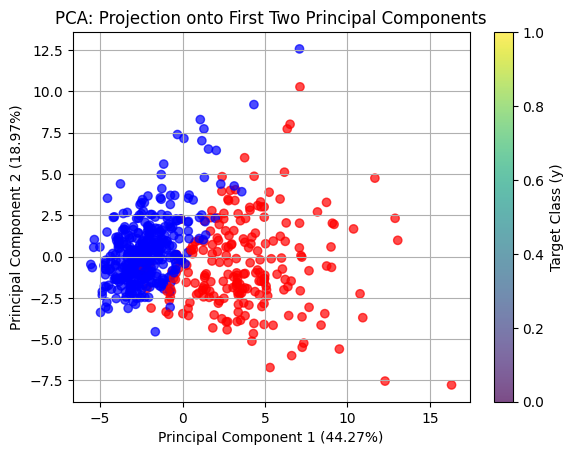

In [37]:
def plot_pca_2d(principal_components, pca_model, y=None):
    """
    Plots the first two principal components.
    
    Args:
        principal_components (np.array): The data transformed by PCA.
        pca_model (PCA): The fitted PCA object (to get variance ratios).
        y (array-like, optional): Labels for coloring the points.
    """
    
    # Get the variance explained by the first two components
    pc1_var = pca_model.explained_variance_ratio_[0]
    pc2_var = pca_model.explained_variance_ratio_[1]
    
    
    scatter = plt.scatter(principal_components[:, 0], 
                          principal_components[:, 1], 
                          c=["red" if label == "M" else "blue" for label in y["Diagnosis"]] if y is not None else None,
                          cmap='viridis', # A common colormap
                          alpha=0.7)
    
    plt.xlabel(f"Principal Component 1 ({pc1_var:.2%})")
    plt.ylabel(f"Principal Component 2 ({pc2_var:.2%})")
    plt.title("PCA: Projection onto First Two Principal Components")
    
    if y is not None:
        plt.colorbar(scatter, label='Target Class (y)')
        
    plt.grid(True)
    plt.show()


plot_pca_2d(principal_components, pca, y=y)

/var/folders/_m/zyrbphls3w34fhsvk8rqt6880000gn/T/ipykernel_11649/4071635868.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(tsne_results[:, 0],


Text(0.5, 0.92, '3D t-SNE Projection')

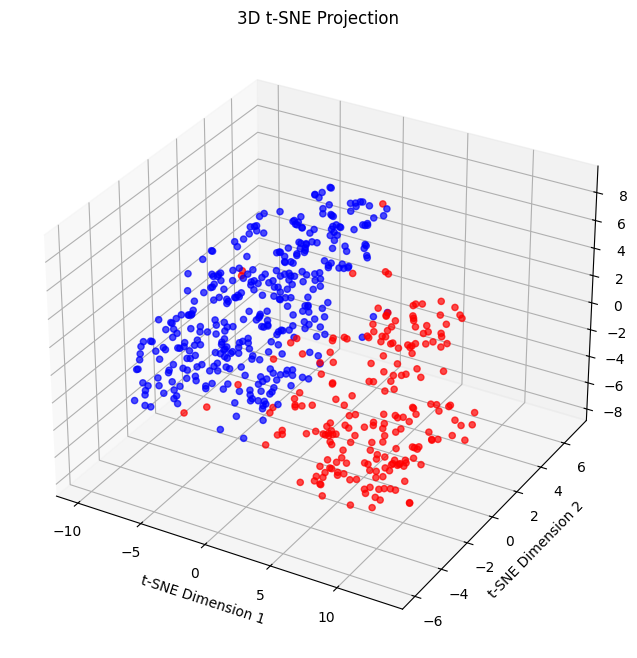

In [ ]:
from sklearn.manifold import TSNE


def fit_tsne(tsne_kwargs, x_data):
    tsne = TSNE(**tsne_kwargs, random_state=RANDOM_STATEs)
    tsne_results = tsne.fit_transform(x_data)
    return tsne_results

def plot_componets_3d(tsne_results, y=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(tsne_results[:, 0],
                         tsne_results[:, 1],
                         tsne_results[:, 2],        
                         c=["red" if label == "M" else "blue" for label in y["Diagnosis"]] if y is not None else None,
                         cmap='viridis', # A common colormap
                         alpha=0.7)
    ax.set_xlabel("t-SNE Dimension 1")
    ax.set_ylabel("t-SNE Dimension 2")
    ax.set_zlabel("t-SNE Dimension 3")
    ax.set_title("3D t-SNE Projection")

tsne_results = fit_tsne({"n_components": 3, "random_state": RANDOM_STATE}, x_scaled)

plot_componets_3d(tsne_results, y)

# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(tsne_results[:, 0],
#                      tsne_results[:, 1],
#                      tsne_results[:, 2],        
#                      c=["red" if label == "M" else "blue" for label in y["Diagnosis"]] if y is not None else None,
#                      cmap='viridis', # A common colormap
#                      alpha=0.7)
# ax.set_xlabel("t-SNE Dimension 1")
# ax.set_ylabel("t-SNE Dimension 2")
# ax.set_zlabel("t-SNE Dimension 3")
# ax.set_title("3D t-SNE Projection from scaled data")